In [2]:
import numpy as np
import matplotlib.pyplot as plt
sbox=(
    0x63,0x7c,0x77,0x7b,0xf2,0x6b,0x6f,0xc5,0x30,0x01,0x67,0x2b,0xfe,0xd7,0xab,0x76,
    0xca,0x82,0xc9,0x7d,0xfa,0x59,0x47,0xf0,0xad,0xd4,0xa2,0xaf,0x9c,0xa4,0x72,0xc0,
    0xb7,0xfd,0x93,0x26,0x36,0x3f,0xf7,0xcc,0x34,0xa5,0xe5,0xf1,0x71,0xd8,0x31,0x15,
    0x04,0xc7,0x23,0xc3,0x18,0x96,0x05,0x9a,0x07,0x12,0x80,0xe2,0xeb,0x27,0xb2,0x75,
    0x09,0x83,0x2c,0x1a,0x1b,0x6e,0x5a,0xa0,0x52,0x3b,0xd6,0xb3,0x29,0xe3,0x2f,0x84,
    0x53,0xd1,0x00,0xed,0x20,0xfc,0xb1,0x5b,0x6a,0xcb,0xbe,0x39,0x4a,0x4c,0x58,0xcf,
    0xd0,0xef,0xaa,0xfb,0x43,0x4d,0x33,0x85,0x45,0xf9,0x02,0x7f,0x50,0x3c,0x9f,0xa8,
    0x51,0xa3,0x40,0x8f,0x92,0x9d,0x38,0xf5,0xbc,0xb6,0xda,0x21,0x10,0xff,0xf3,0xd2,
    0xcd,0x0c,0x13,0xec,0x5f,0x97,0x44,0x17,0xc4,0xa7,0x7e,0x3d,0x64,0x5d,0x19,0x73,
    0x60,0x81,0x4f,0xdc,0x22,0x2a,0x90,0x88,0x46,0xee,0xb8,0x14,0xde,0x5e,0x0b,0xdb,
    0xe0,0x32,0x3a,0x0a,0x49,0x06,0x24,0x5c,0xc2,0xd3,0xac,0x62,0x91,0x95,0xe4,0x79,
    0xe7,0xc8,0x37,0x6d,0x8d,0xd5,0x4e,0xa9,0x6c,0x56,0xf4,0xea,0x65,0x7a,0xae,0x08,
    0xba,0x78,0x25,0x2e,0x1c,0xa6,0xb4,0xc6,0xe8,0xdd,0x74,0x1f,0x4b,0xbd,0x8b,0x8a,
    0x70,0x3e,0xb5,0x66,0x48,0x03,0xf6,0x0e,0x61,0x35,0x57,0xb9,0x86,0xc1,0x1d,0x9e,
    0xe1,0xf8,0x98,0x11,0x69,0xd9,0x8e,0x94,0x9b,0x1e,0x87,0xe9,0xce,0x55,0x28,0xdf,
    0x8c,0xa1,0x89,0x0d,0xbf,0xe6,0x42,0x68,0x41,0x99,0x2d,0x0f,0xb0,0x54,0xbb,0x16) 

In [3]:
#Get a balanced set of traces without having to load all of them
def get_balancedTraces(info_lines, count):
    sorted_hws = get_trace_hws(info_lines)
    ids = []   
    for i in range(9):
        for j in range(count):
            ids.append(sorted_hws[i][j])
    return ids

#Get all Hamming  Weights for the info file
def get_trace_hws(info_lines) : 
    hw = [bin(x).count("1") for x in range(256)]
    sorted_hw = [[] for _ in range(9)]
    
    for i in range(len(info_lines)):
        data = info_lines[i].split()
        key = bytes.fromhex(data[0])
        plain = bytes.fromhex(data[1])
        cipher = bytes.fromhex(data[2])
        
        sbox_line = sbox[plain[0] ^ key[0]]
        hw_line = hw[sbox_line]
        sorted_hw[hw_line].append(i)                    
    return sorted_hw

In [3]:
#get dem traces (AES DPA)

#get data about traces
info_path = r'C:\Users\vascodebruijn\Thesis_Data\dpav4_rsm_index.txt'
info_file = open(info_path,'r')
info_lines = info_file.readlines()

plaintxt = []
ciphertxt = []
shuffle0 =[]
shuffle10=[]
offset=[]
traces = []
keys = []

#trace_ids = range(0,101)
trace_ids = get_balancedTraces(info_lines, 2)
for idx in trace_ids:
    #first extract the information
    data = info_lines[idx].split()
    #plaintxt.append(int(data[1],16))
    #ciphertxt.append(int(data[2],16))
    keys.append(bytes.fromhex(data[0]))
    plaintxt.append(bytes.fromhex(data[1]))
    ciphertxt.append(bytes.fromhex(data[2]))

    #then collect samples
    sample_path = r'C:\Users\vascodebruijn\Thesis_Data\Traces\trace%s' % idx
    sample_file = open(sample_path,'r')
    sample_data = sample_file.readlines()
    traces.append(list(map(int,sample_data)))
    


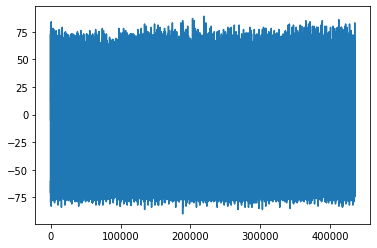

In [4]:
#check the data
plt.plot(traces[0])
plt.show()

In [5]:
#magic happens
tempSbox = [sbox[plaintxt[i][0] ^ keys[i][0]] for i in range(len(plaintxt))]
hw = [bin(x).count("1") for x in range(256)]
tempHW = [hw[s] for s in tempSbox]

In [6]:
tempTracesHW = [[] for _ in range(9)]
for i in range(len(traces)):
    HW = tempHW[i]
    tempTracesHW[HW].append(traces[i])
tempTracesHW = [np.array(tempTracesHW[HW]) for HW in range(9)]

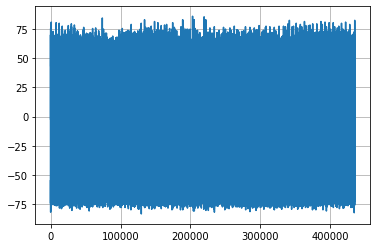

In [7]:
#Get avg values
tempMeans = np.zeros((9, len(traces[0])))
for i in range(9):
    tempMeans[i] = np.average(tempTracesHW[i], 0)
plt.plot(tempMeans[3])
plt.grid()
plt.show()    

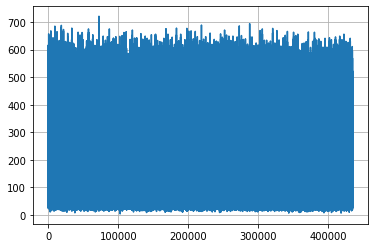

In [8]:
#get SumDiff
tempSumDiff = np.zeros(len(traces[0]))
for i in range(9):
    for j in range(i):
        tempSumDiff += np.abs(tempMeans[i] - tempMeans[j])
plt.plot(tempSumDiff)
plt.grid()
plt.show()

In [9]:
# Some settings that we can change
numPOIs = 5        # How many POIs do we want?
POIspacing = 5     # How far apart do the POIs have to be?

# Make an empty list of POIs
POIs = []

# Repeat until we have enough POIs
for i in range(numPOIs):
    # Find the biggest peak and add it to the list of POIs
    nextPOI = tempSumDiff.argmax()
    POIs.append(nextPOI)
    
    # Zero out some of the surrounding points
    # Make sure we don't go out of bounds
    poiMin = max(0, nextPOI - POIspacing)
    poiMax = min(nextPOI + POIspacing, len(tempSumDiff))
    for j in range(poiMin, poiMax):
        tempSumDiff[j] = 0
        
meanMatrix = np.zeros((9, numPOIs))
for HW in range(9):
    for i in range(numPOIs):
        meanMatrix[HW][i] = tempMeans[HW][POIs[i]]
        
def cov(x, y):
    # Find the covariance between two 1D lists (x and y).
    # Note that var(x) = cov(x, x)
    return np.cov(x, y)[0][1]

covMatrix  = np.zeros((9, numPOIs, numPOIs))
for HW in range(9):
    for i in range(numPOIs):
        for j in range(numPOIs):
            x = tempTracesHW[HW][:,POIs[i]]
            y = tempTracesHW[HW][:,POIs[j]]
            covMatrix[HW,i,j] = cov(x, y)
            


In [10]:
#get dem traces (AES HD)
#traces_path = r'C:\Users\vascodebruijn\Documents\GitHub\AES_HD_Dataset\traces_1.csv'
#traces = np.loadtxt(traces_path)
#label_path = r'C:\Users\vascodebruijn\Documents\GitHub\AES_HD_Dataset\labels.csv'
#labels = np.loadtxt(label_path)